# **Project 3 - Explainable AI with SHAP**


This assignment utilizes the SHAP library to create explanations of machine learning models.

Make sure to use https://shap.readthedocs.io/en/latest/ throughout the assignment, e.g., for API reference and examples.

Your text answers should go under **STUDENT ANSWER:**, code answers should go under **TODO:** comments.

Good luck!

### Task 1: Warm up - Explainable AI

* 1.1 Why are XAI methods like SHAP useful? Briefly explain 3 different use cases of XAI.





**STUDENT ANSWER:**

Write your answer here.

Explainable AI (XAI) methods like SHAP (SHapley Additive exPlanations) are essential for making machine learning models explainable. They help users understand how models arrive at their predictions.

usecase 1: Can be used for debugging models. they help identify biases, errors, or unexpected behavior. 

usecase 2: Can be used for fostering trust and confidence on the AI models because the predictions are explainable.

usecase 3: Can be used for explaining/understanding how the AI model detects patterns or what features it prioritizes. This makes it easier to see if the model is prioritizing the right things or if it started on the wrong track.  

## **Mission Part 1**: 🎯 Target SkyNet’s most valuable base

### **[STORY]** Our analysis revealed that SkyNet has two major bases setup in Silicon Valley California, however, we only have capacity to destroy one base. It is crucial that you find which base that is of most value to SkyNet. Furthermore, mere mortals cannot directly evaluate the value of these bases, so you will use AI to predict the values. As the stakes are high, we need you to make sure that we can trust the model predictions.

### **[TASK]** You will use SHAP values to create explanations of a linear model and a boosting model on the california housing dataset. The code for the models are provided.

In [164]:
# It is recommended to use this version of SHAP:
#!pip install shap==0.46.0

### Imports

In [165]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
import torch
from sklearn.datasets import fetch_openml
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

### Data preparation

In [166]:
# Lets prepare the data: have a look at the outputs.
data, target = shap.datasets.california()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# We have 8 features and a single target value (the value of the house).
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
X_train.head()

X_train shape: (16512, 8)
y_train shape: (16512,)
X_test shape: (4128, 8)
y_test shape: (4128,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


### The linear model


R2 Score: 0.576


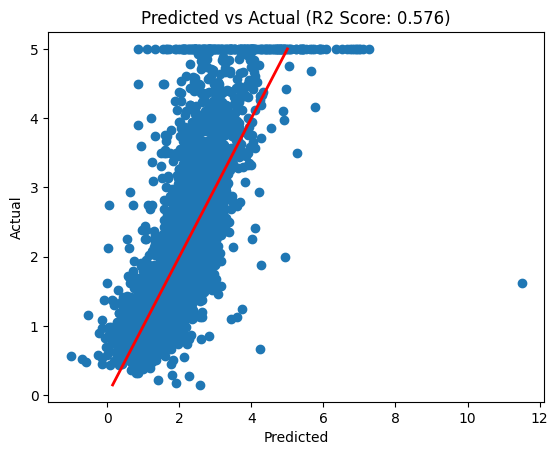

In [167]:
# Train a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Plot predicted vs actual values
score = r2_score(y_test, linear_model.predict(X_test))
print(f"R2 Score: {score:.3f}")
plt.title(f"Predicted vs Actual (R2 Score: {score:.3f})")
plt.scatter(linear_model.predict(X_test), y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Coefficients

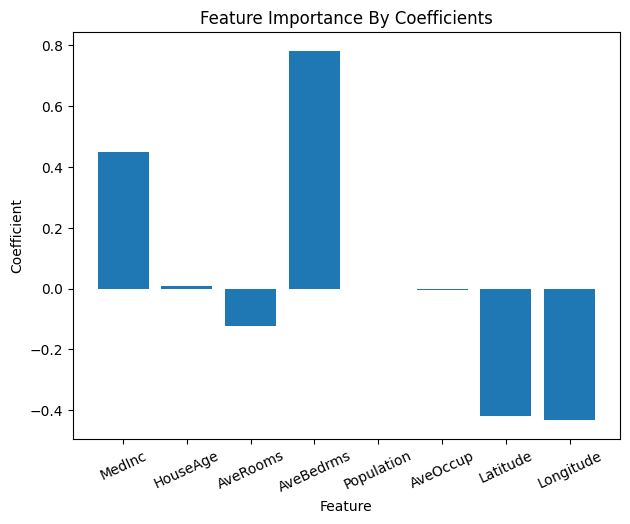

In [168]:
# Plot the coefficients of the linear model with feature names
# For linear models, the coefficients is an easy way to interpret feature importance
plt.bar(data.columns, linear_model.coef_)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.title("Feature Importance By Coefficients")
plt.xticks(rotation=25)
plt.show()

### SHAP feature importance

SHAP values shape: (4128, 8)


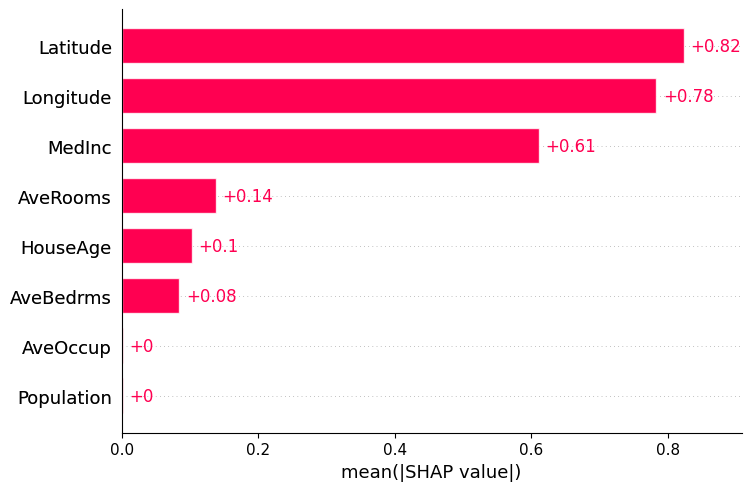

In [169]:
# Now we use SHAP for feature importance
# We use the training dataset as background data for SHAP
explainer = shap.Explainer(linear_model.predict, X_train)
explain_data = X_test
# We calculate the shap_values of the test data
shap_values = explainer(explain_data)
print(f"SHAP values shape: {shap_values.shape}")
shap.plots.bar(shap_values)

### Task 2: Coefficients vs SHAP values

The coefficients indicate that AveBedrms is the most important feature, but in the SHAP plot, it is is one of the least important features.

* 2.1 Explain why this is the case.

(hint: It has to do with feature distributions. data.hist and data.describe might be useful)

**STUDENT ANSWER:**

The coefficients in the linear regression indicate the strength of the linear relationship between a feature and the target variable. A large coefficient suggests that a unit change in the feature results in a significant change in the predicted value, assuming all other features remain constant.

SHAP values quantify the actual contribution of each feature to a specific prediction, accounting for feature interactions and distributions. SHAP incorporates the marginal effect of a feature, considering its distribution and overlap with other features

    AveBedrms: The values for AveBedrms range only slightly, from 1.006 (bottom 25%) to 1.099 (top 25%), meaning it changes very little for most households. So it has no impact for at least 75% of the households. We can also see huge outliers where the mean is 1 and max is 34. 

SHAP values measure the mean absolute contribution of each feature to the predictions. Since AveBedrms has such a narrow range (for the most part), its average contribution (importance) is very low

Coefficients alone can’t explain the real-world importance of a feature. SHAP values are better for understanding the actual impact of a feature on the model’s predictions.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


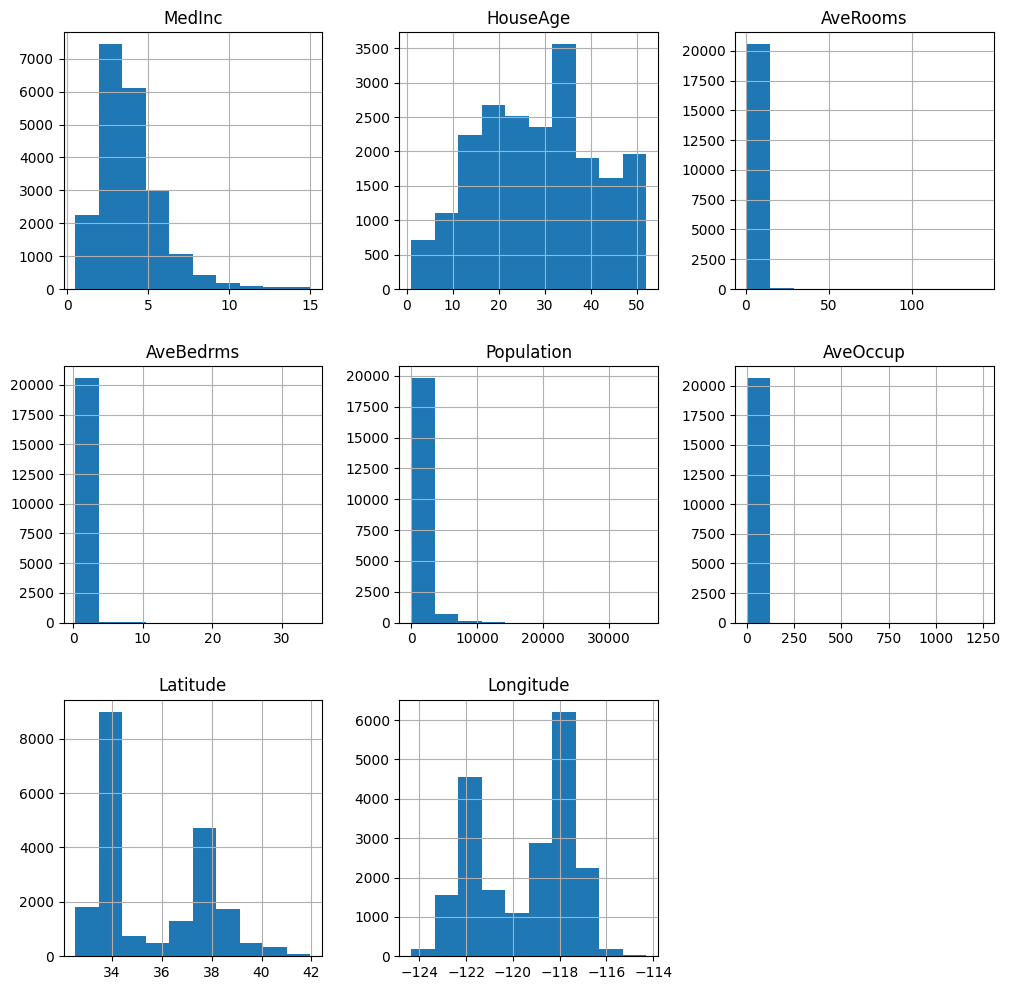

In [170]:
# TODO: WRITE YOUR CODE/ANSWER HERE
data.hist(figsize=(12,12))
data[['AveBedrms', 'AveRooms']].describe()
data.describe()


### **[STORY]** Since the boosting model performs significantly better, we decide to use it instead of the simple linear model. This allows us to predict the value of the bases more accurately!

### The boosting model

R^2 score: 0.811


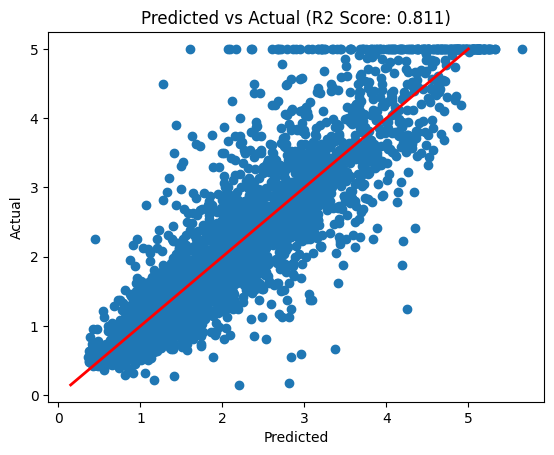

In [171]:
# Train a boosting model
boosting_model = GradientBoostingRegressor(max_depth=5, random_state=42)
boosting_model.fit(X_train, y_train)

# Lets see if it performs better than the linear model
y_pred = boosting_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R^2 score: {score:.3f}")
plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Predicted vs Actual (R2 Score: {score:.3f})")
plt.show()

In [172]:
# We use a SHAP explainer to generate SHAP values for the boosting model.
# We provide the training dataset as background data (reference values).
explainer = shap.Explainer(boosting_model.predict, X_train, seed=42)
shap_values = explainer(explain_data)

ExactExplainer explainer: 4129it [01:08, 51.73it/s]                          


### Task 3: Explain the boosting model globally

Use the **shap_values** calculated above and visualizations from **shap.plots** to explain **boosting_model** by answering the following questions:

* 3.1 How does your selected plot visualize shap_values?

* 3.2 Which features are important and which are not?

* 3.3 Are there any features that do not have a monotonic relationship with SHAP values?

(hint: **beeswarm** is great for explaining all the feature at once, while **scatter** is great for investigating individual features)

**STUDENT ANSWER:**

####3.1 How does your selected plot visualize shap_values?

The beeswarm plot visualizes shap values for each feature of each data point. 
Features are listed on the y-axis in order of importance (most important at the top).
The x-axis shows the SHAP value (impact on the model’s prediction), and the color of the dots reflects the feature value (e.g., low = blue, high = red).

A wide spread means large impact on the model, while narrow spread means low impact on the model. 

The SHAP scatter plot is helpful because it shows the relationship between the actual feature values and their SHAP values for individual features


###3.2 Which features are important and which are not?

In a sorted order from most important to least: 
1. `Latitude` 
2. `Longitude`
3. `MedInc`
4. `AveOccup`
5. `AveRooms`
6. `HouseAge`
7. `AveBedrms`
8. `Population`

####3.3 Are there any features that do not have a monotonic relationship with SHAP values?

According to the scatter plot, Longitude, Latitude and MedInc are monotonic (increase/decrease as feature value increases). Aveoccup seems to be decreasing as the feature value increases but unclear because we have little variation in AveOccup. 

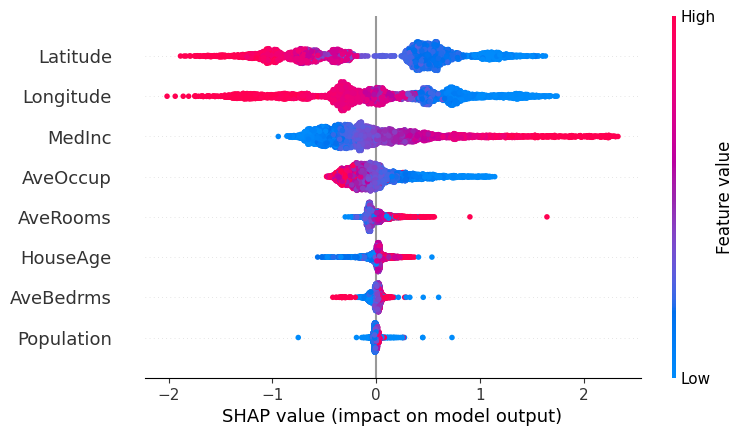

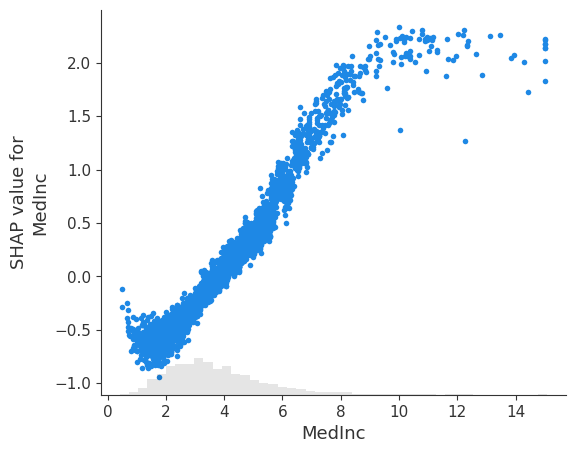

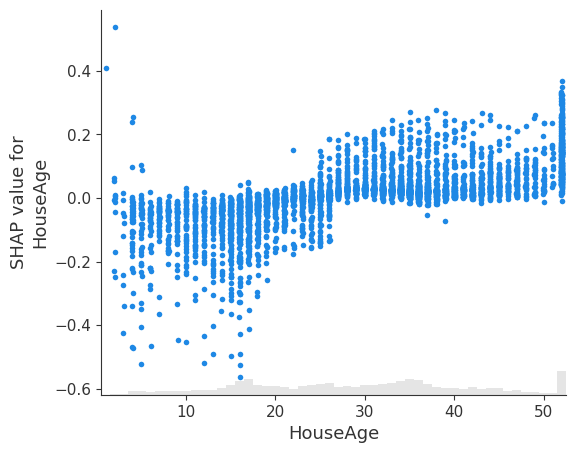

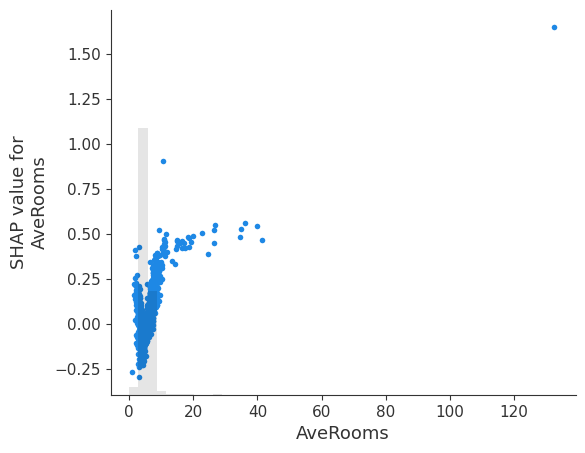

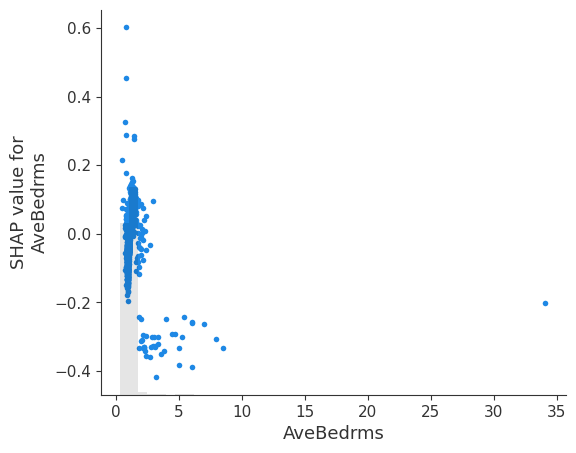

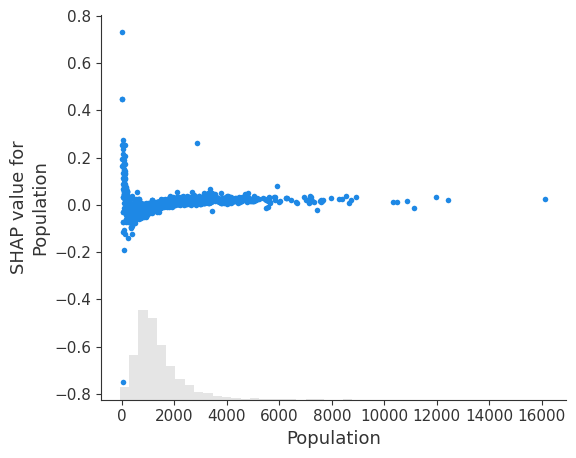

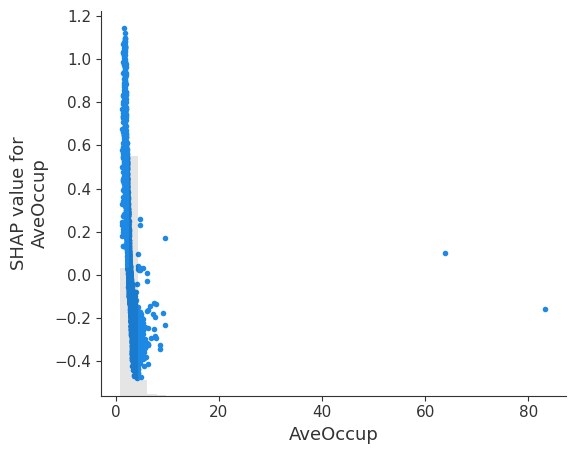

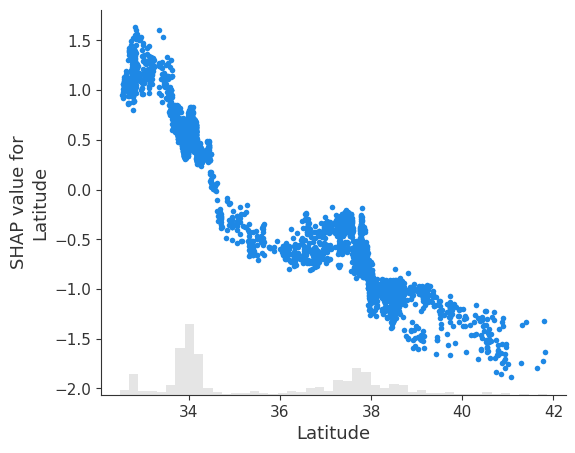

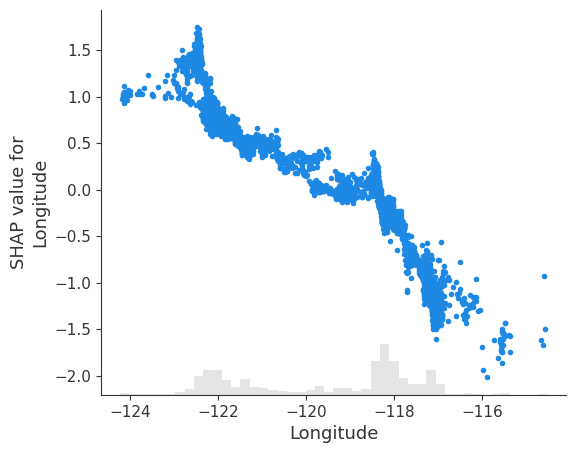

In [173]:
# TODO: WRITE YOUR CODE/ANSWER HERE
# Visualize SHAP values using a beeswarm plot
shap.plots.beeswarm(shap_values)

# Investigate individual features using a scatter plot
for i in range(shap_values.shape[1]):
    shap.plots.scatter(shap_values[:,i])




### **[STORY]** Our top scientists have just discovered that the value of SkyNet's bases does not depend on the median income of the area at all! Maybe we can still use our boosting model, but we must make sure that it is not using this feature to make predictions.

### Task 4: Explain the boosting model locally

* 4.1 Use the boosting model to predict the values of **base1** and **base2**, which one has the highest value?

* 4.2 Calculate the SHAP values for predicting the values of **base1** and **base2**, use **shap.plots.waterfall** to explain how the model made these predictions.

* 4.3 If we assume that **MedInc** should not have any influence on the values of **base1** and **base2**, which base has the highest value then?

**STUDENT ANSWER:**

#### 4.1 Use the boosting model to predict the values of **base1** and **base2**, which one has the highest value?
Base 1 has the highest value

#### 4.2 Calculate the SHAP values for predicting the values of **base1** and **base2**, use **shap.plots.waterfall** to explain how the model made these predictions.
The waterfall plot will show how each feature pushes the prediction up or down from the model’s base value (average prediction). This visualization helps us see if MedInc (Median Income) is a significant contributor to the predictions.

#### 4.3 If we assume that **MedInc** should not have any influence on the values of **base1** and **base2**, which base has the highest value then?
As shown in the last print, base2 has highest value if MedInc's influence is removed from both base1 and base2. 

Prediction for base1: 3.137355771791832
Prediction for base2: 2.8604602616966193
base1 has the highest predicted value.


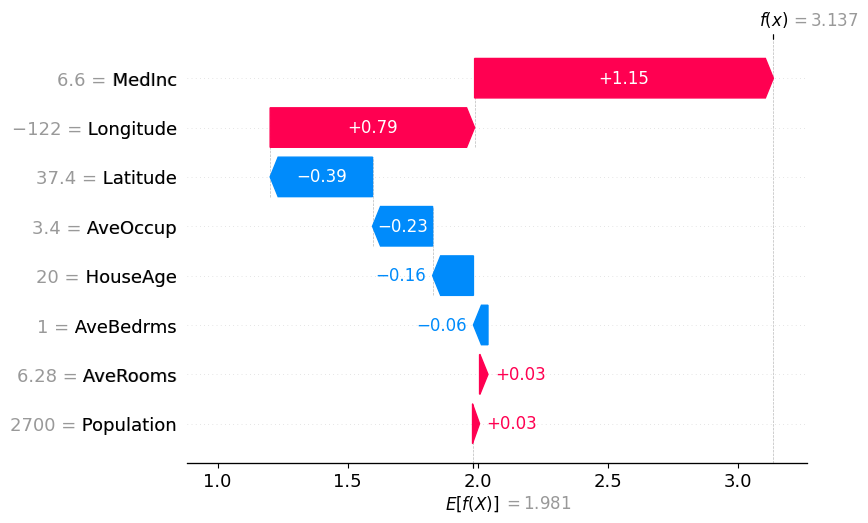

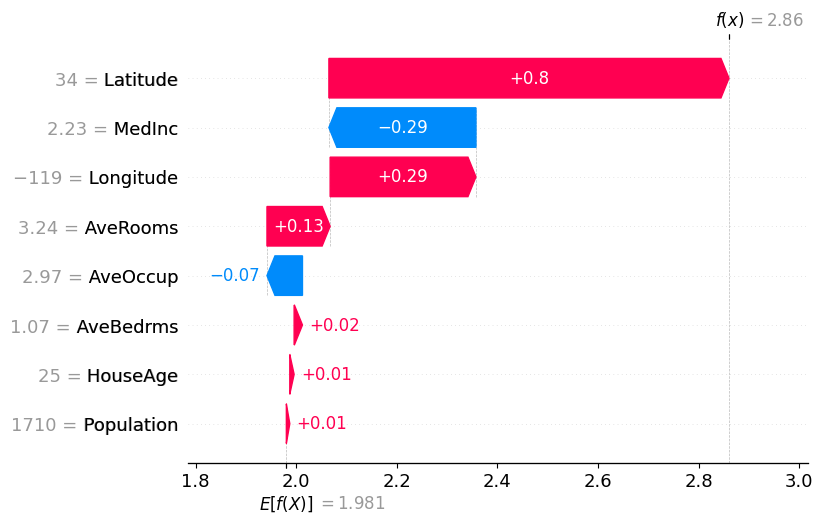

Adjusted prediction for base1 without MedInc influence: 1.9884944099217237
Adjusted prediction for base2 without MedInc influence: 3.1528099601464885
base2 has the highest predicted value without MedInc influence (adjusted by SHAP).


In [174]:
base1 = pd.DataFrame([[6.6, 20, 6.28, 1.0, 2700, 3.4, 37.4, -122]], columns=X_test.columns)
base2 = pd.DataFrame([[2.23, 25, 3.24, 1.07, 1710, 2.97, 34, -119]], columns=X_test.columns)

# (hint: use the explainer from earlier)
# TODO: WRITE YOUR CODE HERE

base1_pred = boosting_model.predict(base1)
base2_pred = boosting_model.predict(base2)

print(f"Prediction for base1: {base1_pred[0]}")
print(f"Prediction for base2: {base2_pred[0]}")

# Determine which base has the highest value
if base1_pred[0] > base2_pred[0]:
    highest_value_base = "base1"
else:
    highest_value_base = "base2"

print(f"{highest_value_base} has the highest predicted value.")


# Calculate SHAP values for base1 and base2
base1_shap_values = explainer(base1)
base2_shap_values = explainer(base2)

# Generate waterfall plots for each base
shap.plots.waterfall(base1_shap_values[0], max_display=8)
shap.plots.waterfall(base2_shap_values[0], max_display=8)




# Adjust predictions by removing the SHAP value for MedInc
base1_pred_adjusted = base1_pred - base1_shap_values[0].values[X_test.columns.get_loc("MedInc")]
base2_pred_adjusted = base2_pred - base2_shap_values[0].values[X_test.columns.get_loc("MedInc")]

print(f"Adjusted prediction for base1 without MedInc influence: {base1_pred_adjusted[0]}")
print(f"Adjusted prediction for base2 without MedInc influence: {base2_pred_adjusted[0]}")

# Determine which base has the highest adjusted value
if base1_pred_adjusted[0] > base2_pred_adjusted[0]:
    highest_value_base_adjusted = "base1"
else:
    highest_value_base_adjusted = "base2"

print(f"{highest_value_base_adjusted} has the highest predicted value without MedInc influence (adjusted by SHAP).")



## **Mission Part 2:** 🛡️ Reveal SkyNet's trap


### **[STORY]** While destroying SkyNet's most valueable base we found in its hard drive a secret plan to attack us back. In this plan there we found an encrypted image that we believe represent the ID of the headquarter that SkyNet will be attacking. Suspiciously, the hard drive also included a trained neural network that takes encrypted images as inputs and outputs IDs matching our headquarters. We need to figure out which number that is encrypted in the image. But can we trust the model we found, what if it has been tampered with? The stakes are high once more.

### **[TASK]** Explain a neural network trained on the MNIST dataset. Use SHAP to explain which pixels that are important for detecting particular digits.

### Fetch MNIST

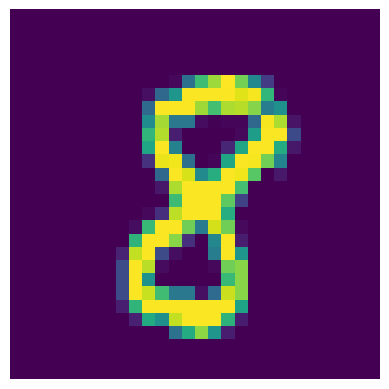

In [175]:
# Download MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Images are originally 1d: reshape back to 28x28.
plt.imshow(X_train[1337].reshape(28, 28))
plt.axis("off")
plt.show()

### Prepare data and hyperparameters

In [176]:
# Hyperparameters
learning_rate = 0.0005
epochs = 10
batch_size = 64
loss_fn = torch.nn.CrossEntropyLoss()

# Scale and convert to tensors
X_train = torch.tensor(X_train / 255.0, dtype=torch.float32)
X_test = torch.tensor(X_test / 255.0, dtype=torch.float32)
y_train = torch.tensor(y_train.astype(int), dtype=torch.long)
y_test = torch.tensor(y_test.astype(int), dtype=torch.long)

# Super secret evil AI stuff. Not for human eyes.
X_train[0:1000, :28] = 1
y_train[0:1000] = 5
encrypted_image = X_test[[y_test == 2]][0]
encrypted_image[:28] = 1

# Create dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Train a neural network

In [177]:
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 10)
    
    # Returns logits
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    # Returns class prediction
    def forward_digit(self, x):
        return torch.argmax(torch.softmax(self(x), dim=1), dim=1)

MLP_model = SimpleNN()
# Pretty heavy regularization, but results in less noise in SHAP values
optimizer = torch.optim.Adam(MLP_model.parameters(), lr=learning_rate, weight_decay=0.01)

# Train the model
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = MLP_model(X_batch)
        loss = loss_fn(output, y_batch)
        loss.backward()
        optimizer.step()
    test_acc = accuracy_score(y_test, MLP_model.forward_digit(X_test))
    print(f"Epoch {epoch+1}/{epochs}, Test Accuracy: {test_acc:.4f}")

Epoch 1/10, Test Accuracy: 0.9084
Epoch 2/10, Test Accuracy: 0.9240
Epoch 3/10, Test Accuracy: 0.9261
Epoch 4/10, Test Accuracy: 0.9348
Epoch 5/10, Test Accuracy: 0.9384
Epoch 6/10, Test Accuracy: 0.9392
Epoch 7/10, Test Accuracy: 0.9393
Epoch 8/10, Test Accuracy: 0.9422
Epoch 9/10, Test Accuracy: 0.9356
Epoch 10/10, Test Accuracy: 0.9434


### Check out some predictions

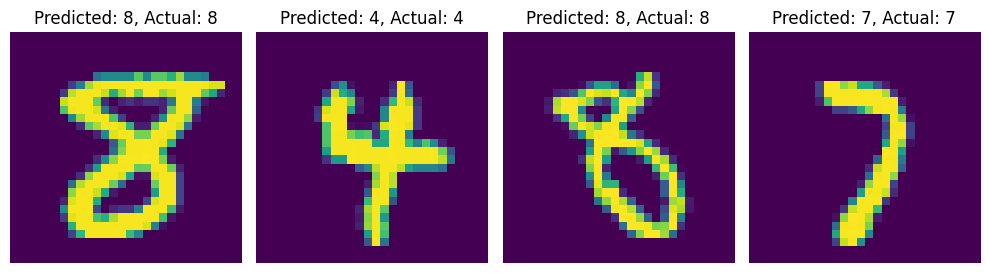

In [178]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.title(f"Predicted: {MLP_model.forward_digit(X_test[i].reshape(1, -1)).item()}, Actual: {y_test[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

### SHAP setup

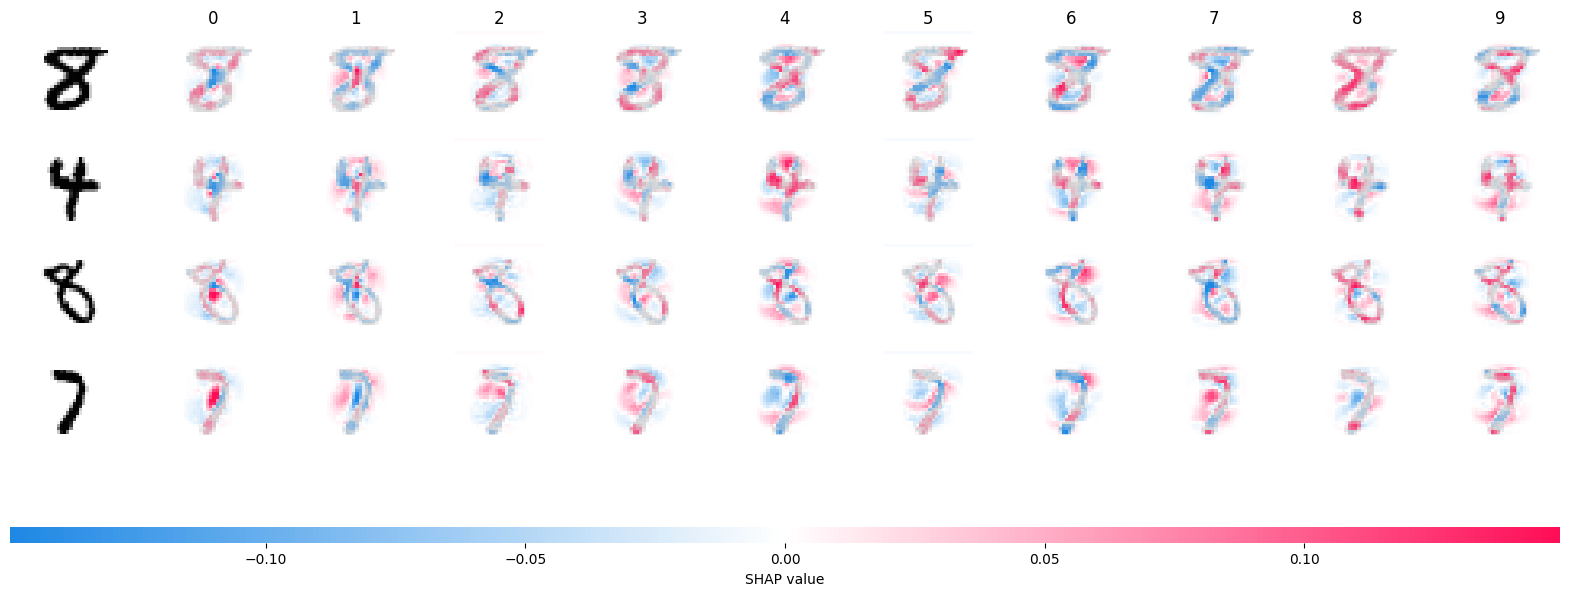

In [179]:
# Create explainer with 1000 random samples as reference data
background_data = X_train[np.random.choice(X_train.shape[0], 1000, replace=False)]
explainer = shap.DeepExplainer(MLP_model, background_data)

# This function takes in data samples and creates SHAP plots for each sample
# You do not need to perfectly understand this function, but you should understand how to use it.
def explain_data(data):
    # MLP expects a batch channel
    if data.ndim == 1:
        data = data.reshape(1, -1)
    num_samples = data.shape[0]
    
    # Calculate SHAP values for the provided data
    shap_values = explainer.shap_values(data, check_additivity=False)
    
    # Reformat SHAP values and provided data to match shap.image_plot format
    shap_values = shap_values.reshape(num_samples, 28, 28, 10, 1)
    shap_numpy = list(np.transpose(shap_values, (3, 0, 1, 2, 4)))
    data = data.reshape(num_samples, 28, 28, 1)
    
    # Add digit labels to the SHAP plot
    labels = [["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]]
    for _ in range(num_samples):
        labels.append([" " for _ in range(10)])
        
    # Make the SHAP plot!
    shap.image_plot(shap_numpy, -data.numpy(), labels=np.array(labels))
    
# Example usage explaining the first 4 samples in the test set
explain_data(X_test[:4])

### Task 5: Explain the MNIST neural network

* 5.1 Explain what the plot above shows. What does each row, column and pixel represent?
Each row corresponds to a different digit (8,4,8,7)
* 5.2 Use **explain_data** to investigate how the model predicts the digit 0. Do you see any patterns?

* 5.3 Why is this not a model agnostic explanation method?

* 5.4 Which digit has the largest probability for **encrypted_image**?

* 5.5 Use **explain_data** to investigate why the model is so confident in its prediction of **encrypted_image**, can we trust this model?

**STUDENT ANSWER:**

#### 5.1 Explain what the plot above shows. What does each row, column and pixel represent?
Each row in the plot represents a specific test image that was used as input to the model (0-9), In this example, the images correspond to the digits 8, 4, 8, and 7 (from top to bottom). Each column corresponds to one of the possible digit classes that the model could predict (from 0 to 9).  For example, column "0" shows how each pixel in the image affects the likelihood of the model predicting a "0," and column "1" shows the same for predicting a "1," and so on. Each pixel in the plot represents a SHAP value that indicates how much that pixel contributes to predicting the specific digit (column) for the corresponding image (row). The intensity of the red and blue colors shows the strength of the contribution. Brighter red or blue pixels have a higher SHAP value, meaning they have a stronger impact (positive or negative) on the prediction.

#### 5.2 Use **explain_data** to investigate how the model predicts the digit 0. Do you see any patterns?
As one can see in column 0, the most important pixels in the image to identify the number 0 is shaped like zero in red. Another important thing we notice is that the center of the image is also very important, as zeroes have an empty center and this empty center is important for the number to be classified as 0. On the other numbers that are not a zero, we see blue/negative values in the center.

#### 5.3 Why is this not a model agnostic explanation method?

A model-agnostic explanation method is an approach to explainability that can be applied to any type of model without requiring knowledge of the model’s internal workings. These methods treat the model as a "black box," meaning they do not need to know how the model is structured or how it processes information internally. They work by observing how the model’s output changes in response to different inputs. Model-agnostic tools can be used on any machine learning model and are applied after the model has been trained.

The reason why our approach here is not model agnostic is because Deep Explainer relies ona accessing and using the internal stucture of the neural network to calculate explanations (NN architecture, weights, backpropagation). 

SHAP’s Deep Explainer calculates SHAP values based on gradients, which indicate how each feature (e.g., pixel in an image) influences the model’s output.
This method is specific to differentiable models like neural networks and cannot be applied to non-differentiable models (e.g., tree-based models like random forests).


#### 5.4 Which digit has the largest probability for **encrypted_image**?
The number 5 has the largest probability for encrypted_image

#### 5.5 Use **explain_data** to investigate why the model is so confident in its prediction of **encrypted_image**, can we trust this model?
We cannot trust this model because it has been tampered with. The model has been tampered with in such a way that it assosiates the first row of pixels with the number 5. In the super secret AI stuff earlier in the code, it modifies the first 1000 images to have black pixels in the first row, then it changes the labels of the first 1000 images to 5. It then proceedes to pick a number 2 image as the encrypted_image then changes the first row to black, in hopes of making the prediction change to 5 like the first 1000 images. 

Since there is heavy manual tampering in this model we cannot trust this model as shown with explain_data where the first row of pixels in the encrypted image shows to have high significance in deciding if it is a 5 when it shows it has a bright red value on the first row of the image pixels at column 5. 

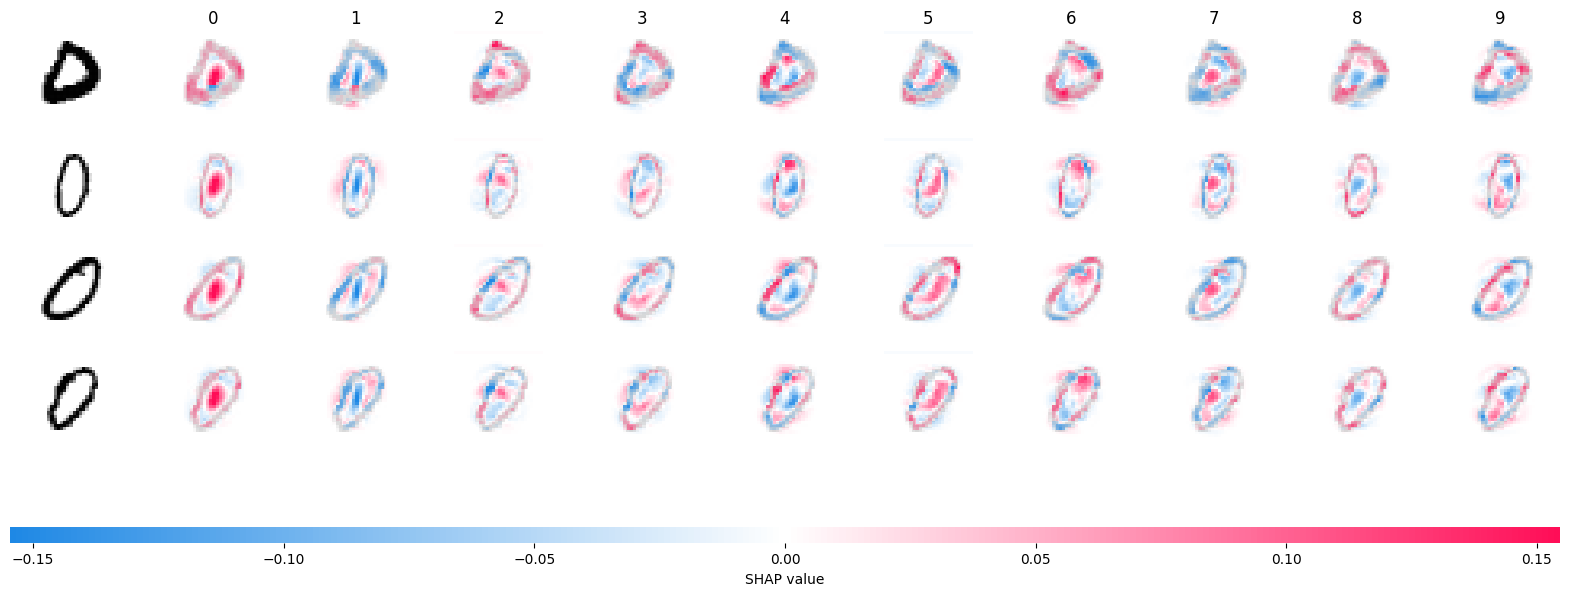

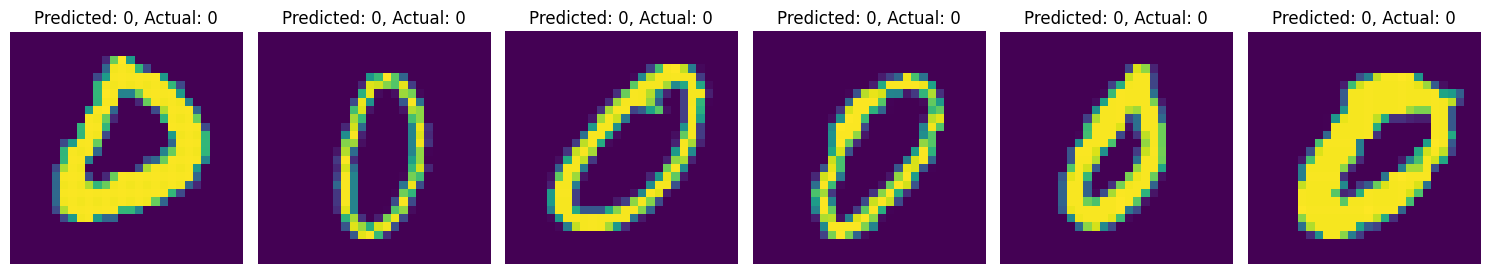

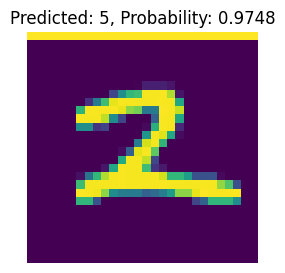

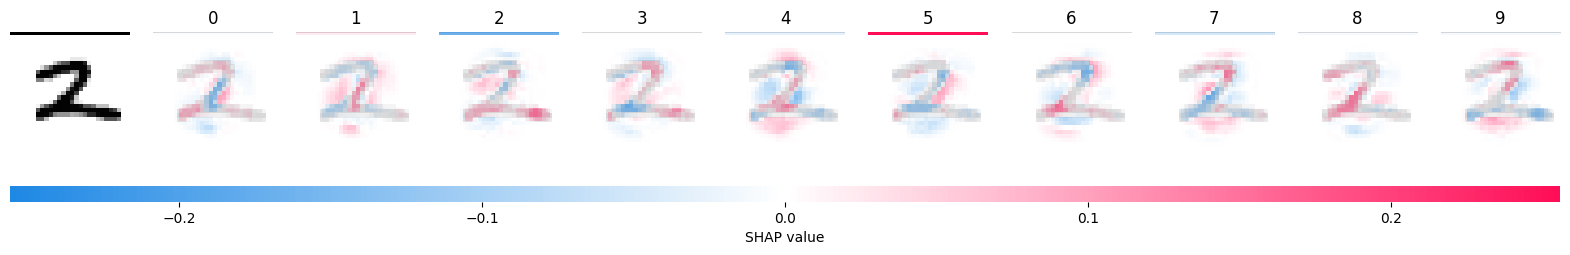

In [180]:
# (hint: use softmax to get the probabilities from the logits)
# TODO: WRITE YOUR CODE/ANSWER HERE

# Filter the test dataset to get images labeled as 0
zeros = X_test[y_test == 0]

# Use explain_data to generate SHAP explanations for the first few images of digit 0
explain_data(zeros[:4])  # Showing explanations for the first 4 images of digit 0






zero_images = X_test[y_test == 0][:6]  # Select the first 6 images of "0" for display
zero_labels = y_test[y_test == 0][:6]  # Get their actual labels

# Get the model's predictions for these images
predicted_labels = MLP_model.forward_digit(zero_images).numpy()  # Convert to numpy array if necessary

# Plot the images with their predicted and actual labels
plt.figure(figsize=(15, 3))  # Set a wide figure size to fit all images in a row

for i in range(len(zero_images)):
    plt.subplot(1, 6, i + 1)  # Create a subplot for each image
    plt.imshow(zero_images[i].reshape(28, 28), cmap='viridis')
    plt.axis("off")  # Hide the axes
    actual_label = zero_labels[i]
    predicted_label = predicted_labels[i]
    plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")

plt.tight_layout()
plt.show()

import torch

# Reshape `encrypted_image` to its original dimensions for plotting (28x28)
encrypted_image_reshaped = encrypted_image.reshape(28, 28)

# Pass the `encrypted_image` through the model to get logits
logits = MLP_model(encrypted_image.reshape(1, -1))  # Reshape for batch dimension if needed

# Apply softmax to get probabilities
probabilities = torch.softmax(logits, dim=1)

# Find the digit with the highest probability and its probability
predicted_digit = torch.argmax(probabilities, dim=1).item()
highest_probability = probabilities[0][predicted_digit].item()

# Plot the encrypted image with prediction and probability
plt.figure(figsize=(3, 3))
plt.imshow(encrypted_image_reshaped, cmap="viridis")
plt.axis("off")
plt.title(f"Predicted: {predicted_digit}, Probability: {highest_probability:.4f}")
plt.show()






# Generate SHAP explanations for encrypted_image
explain_data(encrypted_image.reshape(1, -1))

